In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [14]:
db = pd.read_csv(r'D:\MyCodes\pythonProject\pulse\原始资料\excel\22-08-25\宾\SZYY-244-03-L.csv', header=None)

In [16]:
db1 = db[1:18]
db2 = db[20:37]
db3 = db[39:56]
db2.columns = [i for i in db1]
db3.columns = [i for i in db1]

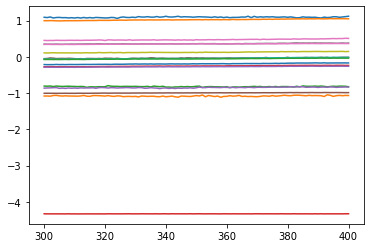

In [18]:
plt.plot(db.loc[300:400, 20:36]);

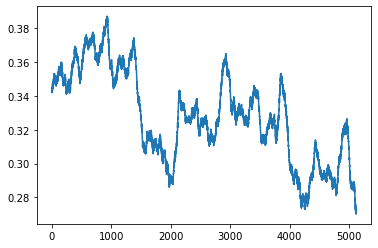

In [12]:
plt.plot(f.loc[0:8120, 36]);

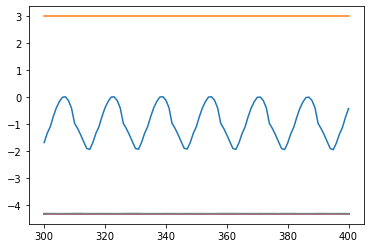

In [13]:
plt.plot(f.loc[300:400, 37:54]);

In [46]:
import lightgbm as lgb
import numpy as np
import pandas as pd

# 加载时序数据
data = [2, 3, 4, 6]

# 将数据转换为DataFrame格式
df = pd.DataFrame({'value': data})

# 构造特征，创建时间索引
df['time_index'] = range(len(data))

# 利用窗口函数计算特征
df['mean_3'] = df['value'].rolling(window=3).mean()
df['min_3'] = df['value'].rolling(window=3).min()
df['max_3'] = df['value'].rolling(window=3).max()

# 删除缺失值
df = df.dropna()

# 分离特征和标签
X = df.drop(['value'], axis=1)
y = df['value']

# 创建LightGBM数据集
lgb_train = lgb.Dataset(X, label=y)

# 设置LightGBM参数
params = {'boosting_type': 'gbdt', 'objective': 'regression'}

# 训练LightGBM模型
gbm = lgb.train(params, lgb_train, num_boost_round=100)

# 预测
predictions = gbm.predict(X)

# 评估模型性能
print('Mean squared error:', np.mean((predictions - y) ** 2))


[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 5.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM